In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.

In [2]:
data = pd.read_csv('complete_data.csv', sep=';')

In [3]:
data.columns

Index(['Unnamed: 0', 'frequency', 'date', '# trans', 'oper #1', 'oper #2',
       'oper #3', 'oper #4', 'oper #5', 'type #1', 'type #2', 'type #3',
       'avg trans amount', 'avg trans balance', 'loan date', 'loan amount',
       'loan duration (mths)', 'loan payments', 'loan status',
       'no. of inhabitants', 'no. of municipalities with inhabitants < 499 ',
       'no. of municipalities with inhabitants 500-1999',
       'no. of municipalities with inhabitants 2000-9999 ',
       'no. of municipalities with inhabitants >10000 ', 'no. of cities ',
       'ratio of urban inhabitants ', 'average salary ',
       'no. of enterpreneurs per 1000 inhabitants ', 'card type', 'birthdate',
       'sex', 'has disponent', 'age at loan (Years)', 'unemploymant rate',
       'no. of commited crimes per capita'],
      dtype='object')

In [4]:
data.dtypes

Unnamed: 0                                             int64
frequency                                             object
date                                                  object
# trans                                              float64
oper #1                                              float64
oper #2                                              float64
oper #3                                              float64
oper #4                                              float64
oper #5                                              float64
type #1                                              float64
type #2                                              float64
type #3                                              float64
avg trans amount                                     float64
avg trans balance                                    float64
loan date                                             object
loan amount                                            int64
loan duration (mths)    

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 35 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         328 non-null    int64  
 1   frequency                                          328 non-null    object 
 2   date                                               328 non-null    object 
 3   # trans                                            328 non-null    float64
 4   oper #1                                            328 non-null    float64
 5   oper #2                                            328 non-null    float64
 6   oper #3                                            328 non-null    float64
 7   oper #4                                            328 non-null    float64
 8   oper #5                                            328 non-null    float64
 9   type #1   

# Preprocessing

In [6]:
data['loan status'].unique()

array([ 1, -1])

In [7]:
{column: len(data[column].unique()) for column in data.columns}

{'Unnamed: 0': 328,
 'frequency': 3,
 'date': 286,
 '# trans': 146,
 'oper #1': 42,
 'oper #2': 6,
 'oper #3': 21,
 'oper #4': 46,
 'oper #5': 86,
 'type #1': 101,
 'type #2': 14,
 'type #3': 65,
 'avg trans amount': 328,
 'avg trans balance': 328,
 'loan date': 283,
 'loan amount': 316,
 'loan duration (mths)': 5,
 'loan payments': 300,
 'loan status': 2,
 'no. of inhabitants': 73,
 'no. of municipalities with inhabitants < 499 ': 52,
 'no. of municipalities with inhabitants 500-1999': 34,
 'no. of municipalities with inhabitants 2000-9999 ': 17,
 'no. of municipalities with inhabitants >10000 ': 6,
 'no. of cities ': 11,
 'ratio of urban inhabitants ': 66,
 'average salary ': 73,
 'no. of enterpreneurs per 1000 inhabitants ': 44,
 'card type': 4,
 'birthdate': 318,
 'sex': 2,
 'has disponent': 2,
 'age at loan (Years)': 319,
 'unemploymant rate': 72,
 'no. of commited crimes per capita': 73}

In [8]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x : 1 if x == positive_value else 0)
    return df
    
def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x : ordering.index(x))
    return df

def special_binary_encode(df, column, negative_value):
    df = df.copy()
    df['card_owner'] = df[column].apply(lambda x : 0 if x == negative_value else 1)
    df = df.drop(column, axis=1)
    return df

In [9]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop index column
    df = df.drop('Unnamed: 0', axis=1)
    
    # Create datetime columns
    for column in ['date', 'loan date', 'birthdate']:
        df[column] = pd.to_datetime(df[column])
    
    df['account_year'] = df['date'].apply(lambda x : x.year)
    df['account_month'] = df['date'].apply(lambda x : x.month)
    df['account_day'] = df['date'].apply(lambda x : x.day)
    
    df['loan_year'] = df['loan date'].apply(lambda x : x.year)
    df['loan_month'] = df['loan date'].apply(lambda x : x.month)
    df['loan_day'] = df['loan date'].apply(lambda x : x.day)
    
    df['birth_year'] = df['birthdate'].apply(lambda x : x.year)
    df['birth_month'] = df['birthdate'].apply(lambda x : x.month)
    df['birth_day'] = df['birthdate'].apply(lambda x : x.day)
    
    df = df.drop(['date', 'loan date', 'birthdate'], axis=1)
    
    
    # Binary encode the Gender column
    df = binary_encode(df, 'sex', positive_value='M')
    
    # Ordinal encode the frequency column
    freq_ordering = [
        'monthly issuance',
        'weekly issuance',
        'issuance after transaction'
    ]
    df = ordinal_encode(df, 'frequency', ordering=freq_ordering)
    
    # Binary encode the card column (has or not card)
    freq_ordering = [
        'monthly issuance',
        'weekly issuance',
        'issuance after transaction'
    ]
    
    df = special_binary_encode(df, 'card type', negative_value='None')
    
    # Encode the label (loan status) column
    label_mapping = {-1: 1, 1: 0}
    df['loan status'] = df['loan status'].replace(label_mapping)
    
    # Split df into X and y
    y = df['loan status'].copy()
    X = df.drop('loan status', axis=1).copy()
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    return X, y

In [10]:
X, y = preprocess_inputs(data)

In [11]:
X

,frequency,# trans,oper #1,oper #2,oper #3,oper #4,oper #5,type #1,type #2,type #3,...,account_year,account_month,account_day,loan_year,loan_month,loan_day,birth_year,birth_month,birth_day,card_owner
0,-0.480560,-0.484123,-1.141262,-0.119264,1.233962,-0.690169,-0.175290,-0.467362,0.187912,-0.546253,...,-0.940336,-1.488531,-0.284807,-2.027475,1.153455,0.723734,0.900846,-0.755336,1.411913,-0.18628
1,1.331207,-0.417122,-0.962069,-0.119264,1.070034,-0.242344,-0.353018,-0.332479,-0.441018,-0.481336,...,-0.940336,-0.305640,0.665998,-0.975241,-0.893170,-0.907402,0.342136,-1.343816,-1.633362,-0.18628
2,1.331207,-0.327787,-1.051665,-0.119264,1.070034,-0.690169,0.135734,-0.298758,0.816842,-0.546253,...,-0.940336,0.285805,-0.997910,-0.975241,-0.308420,-1.124887,0.661399,0.127384,-0.618271,-0.18628
3,-0.480560,0.945232,1.098649,-0.119264,-0.569252,-0.690169,1.601990,0.948911,-0.441018,1.011756,...,0.011609,-0.305640,1.260251,1.129226,-0.893170,0.288764,1.699002,0.715865,0.171245,-0.18628
4,1.331207,1.235569,2.352999,-0.119264,-0.569252,0.205481,1.202102,1.016352,-0.126553,1.660927,...,0.011609,-0.009918,-1.235611,0.076993,0.861080,-1.451114,-0.296388,1.304345,0.284033,-0.18628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,1.331207,-1.444471,-0.872472,-0.119264,-0.569252,-0.690169,-1.419386,-1.310381,-0.755483,-1.520009,...,0.963554,1.764419,1.379102,1.129226,-0.600795,-0.146205,-1.892701,0.127384,0.622397,-0.18628
324,-0.480560,0.163553,1.188245,-0.119264,-0.569252,-0.242344,0.180166,-0.028992,0.502377,0.427503,...,0.963554,1.764419,-0.047105,1.129226,1.153455,-0.689917,0.342136,1.010105,-0.392695,-0.18628
325,1.331207,-1.020131,-0.514087,-0.119264,-0.569252,-0.690169,-0.886202,-0.973173,-0.126553,-1.065590,...,1.915499,-1.488531,1.497952,1.129226,0.276330,1.376188,-1.094545,0.421625,-0.956634,-0.18628
326,1.331207,-0.975464,-0.962069,-0.119264,0.578248,-0.466256,-1.019498,-0.939452,-0.441018,-0.935756,...,1.915499,-1.192809,-1.711014,1.129226,0.276330,0.506249,1.459555,0.421625,-1.407786,-0.18628


In [12]:
{column: len(X[column].unique()) for column in X.columns}

{'frequency': 3,
 '# trans': 146,
 'oper #1': 42,
 'oper #2': 6,
 'oper #3': 21,
 'oper #4': 46,
 'oper #5': 86,
 'type #1': 101,
 'type #2': 14,
 'type #3': 65,
 'avg trans amount': 328,
 'avg trans balance': 328,
 'loan amount': 316,
 'loan duration (mths)': 5,
 'loan payments': 300,
 'no. of inhabitants': 73,
 'no. of municipalities with inhabitants < 499 ': 52,
 'no. of municipalities with inhabitants 500-1999': 34,
 'no. of municipalities with inhabitants 2000-9999 ': 17,
 'no. of municipalities with inhabitants >10000 ': 6,
 'no. of cities ': 11,
 'ratio of urban inhabitants ': 66,
 'average salary ': 73,
 'no. of enterpreneurs per 1000 inhabitants ': 44,
 'sex': 2,
 'has disponent': 2,
 'age at loan (Years)': 319,
 'unemploymant rate': 72,
 'no. of commited crimes per capita': 73,
 'account_year': 4,
 'account_month': 12,
 'account_day': 30,
 'loan_year': 4,
 'loan_month': 12,
 'loan_day': 31,
 'birth_year': 46,
 'birth_month': 12,
 'birth_day': 31,
 'card_owner': 2}

In [13]:
# {column: list(X[column].unique()) for column in X.select_dtypes('object').columns}

# Training

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [49]:
models = [
    LogisticRegression(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    MLPClassifier(),
    RandomForestClassifier()
]

for model in models:
    model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: htt

In [50]:
model_names = [
    "   Logistic Regression",
    "Support Vector Machine",
    "         Decision Tree",
    "        Neural Network",
    "         Random Forest"
]

for model, name in zip(models, model_names):
    print(name + ": {:.4f}%".format(model.score(X_test, y_test) * 100))
    # model.predict_proba(X_test)

   Logistic Regression: 86.8687%
Support Vector Machine: 81.8182%
         Decision Tree: 79.7980%
        Neural Network: 86.8687%
         Random Forest: 85.8586%


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:749: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check 

In [51]:
list(zip(models, model_names))

[(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False), '   Logistic Regression'),
 (SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, probability=True, random_state=None,
      shrinking=True, tol=0.001, verbose=False), 'Support Vector Machine'),
 (DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
    

In [52]:
from sklearn.metrics import roc_curve, auc

y_pred_logistic = models[0].decision_function(X_test)


logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

auc_logistic

0.8964334705075445

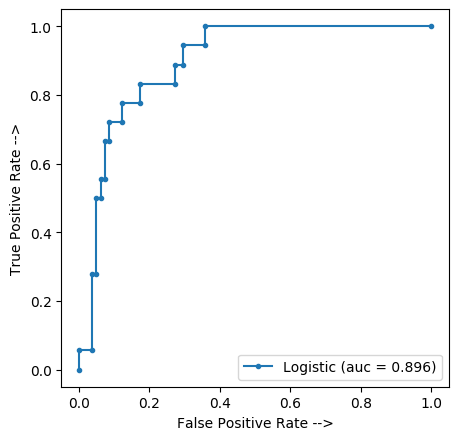

In [53]:


plt.figure(figsize=(5,5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [41]:
#def evaluate_model(model, X_test, y_test, classification_threshold):
    